In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Task 1  Data Exploration

In [4]:
data = pd.read_csv('Raw_data.csv',low_memory=False)

data.head()



,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         28027 non-null  object 
 1   user                        28027 non-null  object 
 2   chatStatus                  19515 non-null  object 
 3   guru                        28027 non-null  object 
 4   guruName                    28027 non-null  object 
 5   gid                         28027 non-null  int64  
 6   uid                         28027 non-null  int64  
 7   consultationType            28027 non-null  object 
 8   website                     28027 non-null  object 
 9   refundStatus                28027 non-null  object 
 10  isWhiteListUser             28027 non-null  bool   
 11  chatSeconds                 19514 non-null  float64
 12  queue                       28027 non-null  bool   
 13  freeCall                    280

In [6]:
data.describe()


,gid,uid,chatSeconds,__v,timeDuration,amount,astrologerOnCallDuration,astrologersEarnings,netAmount,userOnCallDuration,callSeconds
count,28027.000000,28027.000000,19514.000000,28027.000000,21398.000000,9016.000000,8365.000000,9016.000000,9016.000000,8365.000000,2.000000
mean,220.890498,34846.342812,349.158553,0.000178,1.977168,23.742890,128.791871,10.996736,23.734174,118.784818,33000.000000
std,86.575346,7812.317551,319.588213,0.013356,3.340467,87.134998,245.204088,42.141543,87.134775,244.536228,38183.766184
min,8.000000,1.000000,300.000000,0.000000,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000
25%,195.000000,31659.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19500.000000
50%,255.000000,36213.000000,300.000000,0.000000,0.100000,0.000000,34.000000,0.000000,0.000000,8.000000,33000.000000
75%,281.000000,40109.000000,300.000000,0.000000,4.356962,0.000000,189.000000,0.000000,0.000000,180.000000,46500.000000
max,325.000000,44005.000000,7980.000000,1.000000,67.000000,1800.000000,4029.000000,900.000000,1800.000000,4020.000000,60000.000000


In [7]:
# Check for missing values in each column
missing_data = data.isnull().sum()
missing_data


_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus        

### Exploring Each Columns

### `Chatstatus`

In [8]:
data.chatStatus.unique()

array(['incomplete', 'failed', nan, 'completed', 'pending', 'started'],
      dtype=object)

In [9]:
# Analyze missing data in chatStatus
print("Total number of records:", len(data))
print("Number of missing values in chatStatus:", data['chatStatus'].isnull().sum())
print("Percentage of missing values in chatStatus: {:.2f}%".format(data['chatStatus'].isnull().sum() / len(data) * 100))


chat_status_counts = data['chatStatus'].value_counts(dropna=False)
chat_status_percentages = data['chatStatus'].value_counts(dropna=False, normalize=True) * 100


chat_status_analysis = pd.DataFrame({
    'Count': chat_status_counts,
    'Percentage': chat_status_percentages
})

print("\nDetailed breakdown of chatStatus values:")
print(chat_status_analysis)


Total number of records: 28027
Number of missing values in chatStatus: 8512
Percentage of missing values in chatStatus: 30.37%

Detailed breakdown of chatStatus values:
            Count  Percentage
chatStatus                   
NaN          8512   30.370714
failed       7256   25.889321
incomplete   6641   23.695008
completed    5535   19.748814
pending        48    0.171263
started        35    0.124880


The missing values in `chatStatus` are of Nan value which symbolises the status of the chat is not known

Which Means it has 2 conditions --

* The chat is not in the database
* The chat is not known

Since the chat is not in the database, we can replace the NaN with 'NOTKNOWN'


In [10]:
# Replacing NaN values in chatStatus with 'NOTKNOWN'

data['chatStatus'] = data['chatStatus'].fillna('NOTKNOWN')


In [11]:
data.chatStatus.unique()


array(['incomplete', 'failed', 'NOTKNOWN', 'completed', 'pending',
       'started'], dtype=object)

### Handling Missing Values in `chatSeconds`



In [12]:
data.chatSeconds.unique()


array([ 300.,   nan,  420.,  360.,  600.,  660.,  480.,  540., 3840.,
       7980., 7920.,  720., 1140., 1440., 1500.,  900., 3180., 3120.,
       2580., 1080., 2880., 3540., 1020., 1260., 1380., 2400., 1680.,
       1200.,  960.,  780., 2940., 1560.,  840., 1620., 1320., 2700.,
       4080., 3300., 1920., 1860., 1740., 3660., 1980., 1800., 2040.,
       2220., 2280., 4500., 4380., 2460., 7740., 7500., 3900., 6660.,
       3000.])

#### Undertsanding the patterns in rows with NaN chatSeconds

In [13]:
print("Rows with NaN chatSeconds but valid start/end times:")
mask = (data['chatSeconds'].isna() & 
        data['chatStartTime'].notna() & 
        data['chatEndTime'].notna())


print(data[mask][['chatStatus', 'chatStartTime', 'chatEndTime', 'timeDuration']].head())



Rows with NaN chatSeconds but valid start/end times:
Empty DataFrame
Columns: [chatStatus, chatStartTime, chatEndTime, timeDuration]
Index: []


### Analyzing relationship between chatStatus and chatSeconds

##### Let's examine:
* 1. Average chatSeconds for each chatStatus
* 2. Distribution of chatSeconds across different chatStatus
* 3. Presence of NaN values in chatSeconds for each chatStatus

Since the chatSeconds has 8513 and chatstatus jad 8512 NAN Values, there could be a relationship between chatStatus and chatSeconds


In [14]:
# Calculating average chatSeconds for each chatStatus

print("Average chatSeconds by chatStatus:")
avg_by_status = data.groupby('chatStatus')['chatSeconds'].mean()
avg_by_status



Average chatSeconds by chatStatus:


chatStatus
NOTKNOWN             NaN
completed     339.837398
failed        353.714680
incomplete    352.356573
pending       321.250000
started       310.285714
Name: chatSeconds, dtype: float64

In [15]:
# Calculating  median chatSeconds for each chatStatus (less sensitive to outliers than mean)

print("\nMedian chatSeconds by chatStatus:")

median_by_status = data.groupby('chatStatus')['chatSeconds'].median()
median_by_status




Median chatSeconds by chatStatus:


chatStatus
NOTKNOWN        NaN
completed     300.0
failed        300.0
incomplete    300.0
pending       300.0
started       300.0
Name: chatSeconds, dtype: float64

In [16]:
print("\nCount of records by chatStatus:")
status_counts = data['chatStatus'].value_counts()
status_counts



Count of records by chatStatus:


chatStatus
NOTKNOWN      8512
failed        7256
incomplete    6641
completed     5535
pending         48
started         35
Name: count, dtype: int64

In [17]:
# Calculating percentage of NaN chatSeconds for each chatStatus

print("\nPercentage of NaN chatSeconds by chatStatus:")

nan_pct_by_status = data.groupby('chatStatus')['chatSeconds'].apply(lambda x: x.isna().mean() * 100)
nan_pct_by_status



Percentage of NaN chatSeconds by chatStatus:


chatStatus
NOTKNOWN      100.000000
completed       0.000000
failed          0.013782
incomplete      0.000000
pending         0.000000
started         0.000000
Name: chatSeconds, dtype: float64

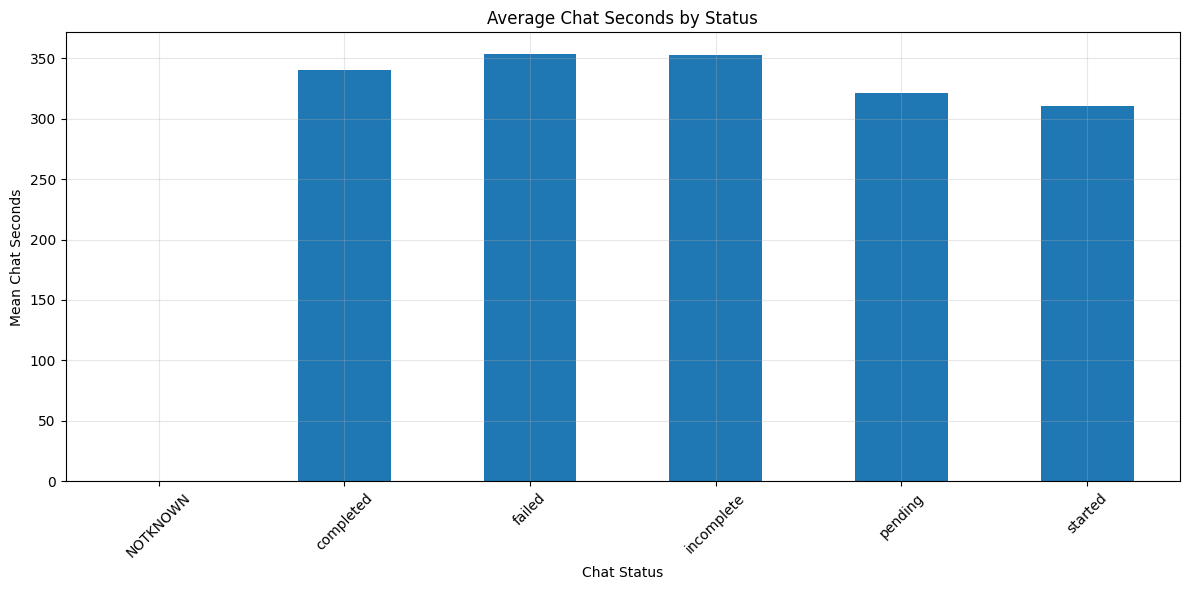

In [18]:
plt.figure(figsize=(12,6))
avg_by_status.plot(kind='bar')
plt.title('Average Chat Seconds by Status')
plt.xlabel('Chat Status')
plt.ylabel('Mean Chat Seconds')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Its clear from the above calculation on Avg, Mean & Count Percentage of NaN values in chatSeconds & ChatStatus,
#### The chatStatus has a relationship with the chatSeconds   
- Every NaN Value in chatSeconds has a chatStatus of 'NOTKNOWN'


In [19]:
# checking chatseconds for chatStatus NOTKNOWN

notknown_mask = data['chatStatus'] == 'NOTKNOWN'
total_notknown = notknown_mask.sum()





In [20]:
empty_stats = {
    'chatStartTime': data[notknown_mask]['chatStartTime'].isna().sum(),
    'chatEndTime': data[notknown_mask]['chatEndTime'].isna().sum(),
    'timeDuration': data[notknown_mask]['timeDuration'].isna().sum()
}

print(f"\nFor chatStatus = NOTKNOWN (total rows: {total_notknown}):")
for field, empty_count in empty_stats.items():
    print(f"{field}:")
    print(f"Empty rows: {empty_count}")
    print(f"Percentage empty: {(empty_count/total_notknown*100):.1f}%")



For chatStatus = NOTKNOWN (total rows: 8512):
chatStartTime:
Empty rows: 8512
Percentage empty: 100.0%
chatEndTime:
Empty rows: 8512
Percentage empty: 100.0%
timeDuration:
Empty rows: 146
Percentage empty: 1.7%


From the above analysis, we can see that when the ChatStatus is NOTKNOWN, No chats had been done.
* Which clearly means for chatstatus = NOTKNOWN, "no chat had been done". or the data is not available for that chat.


In [21]:
# Ensure chatStartTime and chatEndTime are in datetime format
data['chatStartTime'] = pd.to_datetime(data['chatStartTime'], errors='coerce')
data['chatEndTime'] = pd.to_datetime(data['chatEndTime'], errors='coerce')

# Calculate chatSeconds where it is NaN by subtracting start and end times
data.loc[data['chatSeconds'].isna(), 'chatSeconds'] = (data['chatEndTime'] - data['chatStartTime']).dt.total_seconds()

In [22]:
data.chatSeconds.isna().sum()

np.int64(8513)

#### From above 2 cells It is clear that for ChatSeconds = NaN there is no record for chatend and chatstart hence we can't clearly calculate the chatduration 

- We Assuming the `chatSeconds` for NaN = ZERO

In [23]:

data['chatSeconds'] = data['chatSeconds'].fillna(0)


In [24]:
data.chatSeconds.isna().sum()

np.int64(0)

### Handling `timeduration`

In [25]:
data.timeDuration.isna().sum()



np.int64(6629)

In [26]:
# Calculate timeDuration where it is NaN by subtracting chatStartTime and chatEndTime
# Convert to hours by dividing total seconds by 3600
data.loc[data['timeDuration'].isna(), 'timeDuration'] = (data['chatEndTime'] - data['chatStartTime']).dt.total_seconds() / 3600


In [27]:
data.timeDuration.isna().sum()

np.int64(6629)

In [28]:

print("Total missing timeDuration values:", data.timeDuration.isna().sum())

print(data[data.timeDuration.isna()][['chatStartTime', 'chatEndTime', 'chatSeconds', 'timeDuration']].head())



print("\nChat status distribution for missing timeDuration:")
print(data[data.timeDuration.isna()].chatStatus.value_counts())


Total missing timeDuration values: 6629
   chatStartTime chatEndTime  chatSeconds  timeDuration
4            NaT         NaT        300.0           NaN
18           NaT         NaT        300.0           NaN
20           NaT         NaT        300.0           NaN
31           NaT         NaT        300.0           NaN
35           NaT         NaT        300.0           NaN

Chat status distribution for missing timeDuration:
chatStatus
failed      6433
NOTKNOWN     146
pending       48
started        2
Name: count, dtype: int64


From the above analysis we can see that we have chatSeconds = 300 for some time Duartion NaN 

Which have following possibilties:

* Each user had assigned 300 seconds of chatting duration.
* The chat got Failed before starting
   - Since we have 6433 Trasactions which got failed hence it is prooving the above assumptions


In [29]:
data['timeDuration'] = data['timeDuration'].fillna(0)

In [30]:
data.timeDuration.isna().sum()

np.int64(0)

### Handling `statementEntryId`

In [31]:
data.statementEntryId.unique()

array(['656922f3919324acb6e8713b', '65692413919324acb6e87443',
       '65692612919324acb6e8773a', ..., '6595f23d849de2bb564ee1cc',
       '6595f385883c1bbae79c58e5', '6595f407883c1bbae79c6e13'],
      shape=(27877,), dtype=object)

In [32]:
data.statementEntryId.isna().sum()






np.int64(151)

In [33]:

print("\nChat status distribution for missing statementEntryId:")
print(data[data.statementEntryId.isna()].chatStatus.value_counts())




Chat status distribution for missing statementEntryId:
chatStatus
NOTKNOWN    151
Name: count, dtype: int64


From the above oberservations we can see that `statementEntryId` is Missing for `ChatStatus` = NOTKNOWN which is probably due to data not present

In [34]:
data['statementEntryId'] = data['statementEntryId'].fillna(0)



callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus          11769
astrologerOnCallDuration      19662
astrologersEarnings           19011
netAmount                     19011
region                        19008
userCallStatus                18682
userOnCallDuration            19662
RecordingUrl                  23702
feedback                      25411
hideHistory                    8689
cardPosition                  27317
Remedies                      27925
offer                          9249
refunds[0]                    28022
source                        11736
callSeconds                   28025
complementaryCallOrganiser    28025
disconnectedBy                28018
dtype: int64

#### Handling `chatStartTime` and `chatEndTime`

In [35]:
# Let's analyze chatStartTime and chatEndTime
print("\nMissing values:")
print("chatStartTime missing:", data['chatStartTime'].isna().sum())
print("chatEndTime missing:", data['chatEndTime'].isna().sum())

# Basic statistics
print("\nBasic statistics:")
print("\nchatStartTime:")
print(data['chatStartTime'].describe())
print("\nchatEndTime:") 
print(data['chatEndTime'].describe())

# Check for invalid timestamps (e.g. where end time is before start time)
valid_times = data[['chatStartTime', 'chatEndTime']].notna().all(axis=1)
invalid_sequence = data[valid_times & (data['chatStartTime'] > data['chatEndTime'])]
print("\nNumber of chats where end time is before start time:", len(invalid_sequence))

# Distribution of chat durations for valid timestamps
valid_duration = data[valid_times & (data['chatEndTime'] >= data['chatStartTime'])]
duration = valid_duration['chatEndTime'] - valid_duration['chatStartTime']
print("\nChat duration statistics (in seconds):")
print(duration.describe())



Missing values:
chatStartTime missing: 18697
chatEndTime missing: 14996

Basic statistics:

chatStartTime:
count                                   9330
mean     2023-12-16 23:19:30.848512768+00:00
min         2023-12-01 00:07:33.248000+00:00
25%      2023-12-05 10:16:52.251000064+00:00
50%      2023-12-18 16:21:31.289999872+00:00
75%      2023-12-26 10:05:14.892499968+00:00
max         2024-01-03 23:57:11.947000+00:00
Name: chatStartTime, dtype: object

chatEndTime:
count                                  13031
mean     2023-12-17 08:32:47.860740096+00:00
min         2023-12-01 00:07:33.773000+00:00
25%         2023-12-11 10:33:02.192000+00:00
50%         2023-12-18 07:15:19.404000+00:00
75%      2023-12-23 18:06:51.981000192+00:00
max         2024-01-03 23:57:12.445000+00:00
Name: chatEndTime, dtype: object

Number of chats where end time is before start time: 67

Chat duration statistics (in seconds):
count                         9233
mean     0 days 00:02:55.974643344
std      0 da

In [36]:
# Analyze patterns in missing data for chatStartTime and chatEndTime

# Calculate percentage of missing values
total_records = len(data)
pct_missing_start = (data['chatStartTime'].isna().sum() / total_records) * 100
pct_missing_end = (data['chatEndTime'].isna().sum() / total_records) * 100

print("\nPercentage of missing values:")
print(f"chatStartTime: {pct_missing_start:.2f}%")
print(f"chatEndTime: {pct_missing_end:.2f}%")

# Analyze if missing values occur together
both_missing = data[data['chatStartTime'].isna() & data['chatEndTime'].isna()]
only_start_missing = data[data['chatStartTime'].isna() & ~data['chatEndTime'].isna()]
only_end_missing = data[~data['chatStartTime'].isna() & data['chatEndTime'].isna()]

print("\nMissing value patterns:")
print(f"Records with both timestamps missing: {len(both_missing)}")
print(f"Records with only start time missing: {len(only_start_missing)}")
print(f"Records with only end time missing: {len(only_end_missing)}")

# Analyze relationship with chat status
print("\nMissing timestamps by chat status:")
missing_by_status = data[data['chatStartTime'].isna() | data['chatEndTime'].isna()].groupby('chatStatus').size()
print(missing_by_status)

# Calculate percentage of missing values within each chat status
print("\nPercentage of missing timestamps within each chat status:")
missing_pct_by_status = (data[data['chatStartTime'].isna() | data['chatEndTime'].isna()].groupby('chatStatus').size() / 
                        data.groupby('chatStatus').size() * 100)
print(missing_pct_by_status)



Percentage of missing values:
chatStartTime: 66.71%
chatEndTime: 53.51%

Missing value patterns:
Records with both timestamps missing: 14966
Records with only start time missing: 3731
Records with only end time missing: 30

Missing timestamps by chat status:
chatStatus
NOTKNOWN      8512
failed        7086
incomplete    3079
pending         48
started          2
dtype: int64

Percentage of missing timestamps within each chat status:
chatStatus
NOTKNOWN      100.000000
completed            NaN
failed         97.657111
incomplete     46.363499
pending       100.000000
started         5.714286
dtype: float64


* For `ChatStatus` = NOTKNOWN and Failed we have considered it as ZERO for both `chatstartTime` and `ChatendTime`

In [37]:
# Set chatStartTime and chatEndTime to 0 for chats with status 'NOTKNOWN' or 'failed'
data.loc[data['chatStatus'].isin(['NOTKNOWN', 'failed']), ['chatStartTime', 'chatEndTime']] = 0


C:\Users\abhas\AppData\Local\Temp\ipykernel_5712\3114539099.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  data.loc[data['chatStatus'].isin(['NOTKNOWN', 'failed']), ['chatStartTime', 'chatEndTime']] = 0
C:\Users\abhas\AppData\Local\Temp\ipykernel_5712\3114539099.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  data.loc[data['chatStatus'].isin(['NOTKNOWN', 'failed']), ['chatStartTime', 'chatEndTime']] = 0


In [38]:
print("chatStartTime missing:", data['chatStartTime'].isna().sum())
print("chatEndTime missing:", data['chatEndTime'].isna().sum())

chatStartTime missing: 3127
chatEndTime missing: 50


For Chatstatus = Incomplete we are calcuating the time

In [55]:
data.userOnCallDuration.isna().sum()


np.int64(19662)


Missing userOnCallDuration by chat status:
chatStatus
NOTKNOWN       148
completed     5535
failed        7255
incomplete    6641
pending         48
started         35
dtype: int64

Percentage of missing userOnCallDuration within each chat status:
chatStatus
NOTKNOWN        1.738722
completed     100.000000
failed         99.986218
incomplete    100.000000
pending       100.000000
started       100.000000
dtype: float64

Total missing userOnCallDuration values: 19662
Percentage of missing userOnCallDuration: 70.15 %


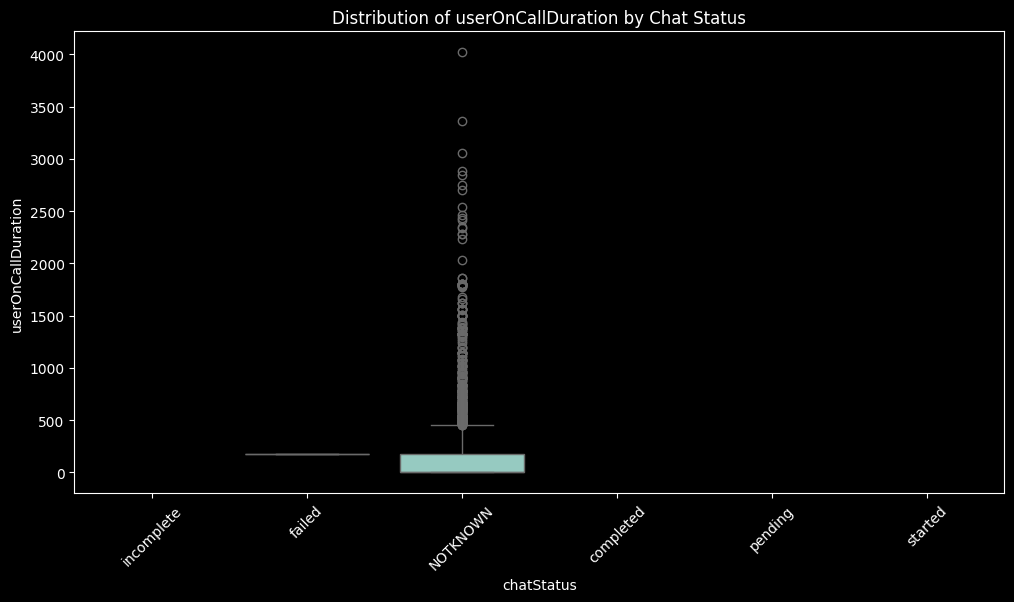

In [56]:
# Analyze missing values in userOnCallDuration
print("\nMissing userOnCallDuration by chat status:")
missing_call_duration = data[data['userOnCallDuration'].isna()].groupby('chatStatus').size()
print(missing_call_duration)

# Calculate percentage of missing values within each chat status
print("\nPercentage of missing userOnCallDuration within each chat status:")
missing_call_duration_pct = (data[data['userOnCallDuration'].isna()].groupby('chatStatus').size() / 
                           data.groupby('chatStatus').size() * 100)
print(missing_call_duration_pct)

# Basic statistics about missing vs non-missing values
print("\nTotal missing userOnCallDuration values:", data['userOnCallDuration'].isna().sum())
print("Percentage of missing userOnCallDuration:", 
      (data['userOnCallDuration'].isna().sum() / len(data) * 100).round(2), "%")

# Create a box plot to visualize userOnCallDuration distribution by chat status
plt.figure(figsize=(12, 6))
sns.boxplot(x='chatStatus', y='userOnCallDuration', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of userOnCallDuration by Chat Status')
plt.show()


Analysis of userOnCallDuration by chat status:

Summary statistics by chat status:
            count        mean         std    min     max
chatStatus                                              
NOTKNOWN     8364  118.777499  244.549931    0.0  4020.0
completed       0         NaN         NaN    NaN     NaN
failed          1  180.000000         NaN  180.0   180.0
incomplete      0         NaN         NaN    NaN     NaN
pending         0         NaN         NaN    NaN     NaN
started         0         NaN         NaN    NaN     NaN

Percentage of missing values by chat status:
chatStatus
NOTKNOWN        1.738722
completed     100.000000
failed         99.986218
incomplete    100.000000
pending       100.000000
started       100.000000
Name: userOnCallDuration, dtype: float64


<Figure size 1200x600 with 0 Axes>

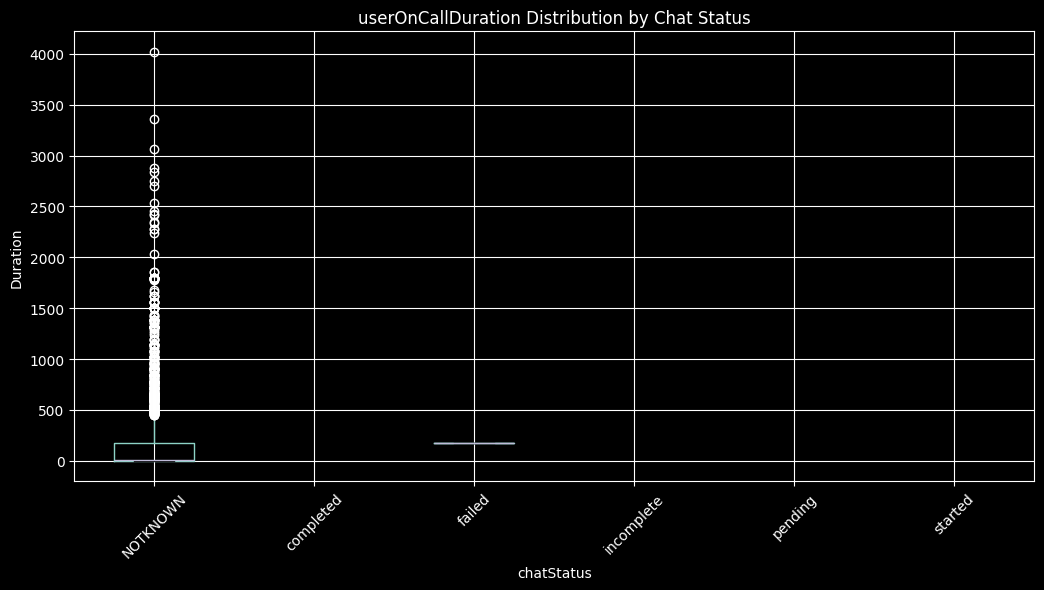

In [54]:
data.userOnCallDuration.isna().sum()

## Identifying Key Numeric Coloumns

In [39]:
key_numeric_columns = [
    'chatSeconds',      
    'timeDuration',    
    'amount',          
    'astrologerOnCallDuration',  
    'astrologersEarnings',       
    'netAmount',                
    'userOnCallDuration'        
]


In [40]:
summary_stats = data[key_numeric_columns].describe()

In [41]:
data.astrologersEarnings.describe()

count    9016.000000
mean       10.996736
std        42.141543
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       900.000000
Name: astrologersEarnings, dtype: float64

In [44]:
print("\nSummary Statistics for Key Metrics:")
print(summary_stats)


Summary Statistics for Key Metrics:
--------------------------------------------------------------------------------
       chatSeconds  timeDuration       amount  astrologerOnCallDuration  \
count  28027.00000  28027.000000  9016.000000               8365.000000   
mean     243.10415      1.509525    23.742890                128.791871   
std      311.28032      3.037316    87.134998                245.204088   
min        0.00000     -0.166667     0.000000                  0.000000   
25%        0.00000      0.000000     0.000000                  0.000000   
50%      300.00000      0.000000     0.000000                 34.000000   
75%      300.00000      3.000000     0.000000                189.000000   
max     7980.00000     67.000000  1800.000000               4029.000000   

       astrologersEarnings    netAmount  userOnCallDuration  
count          9016.000000  9016.000000         8365.000000  
mean             10.996736    23.734174          118.784818  
std              42.

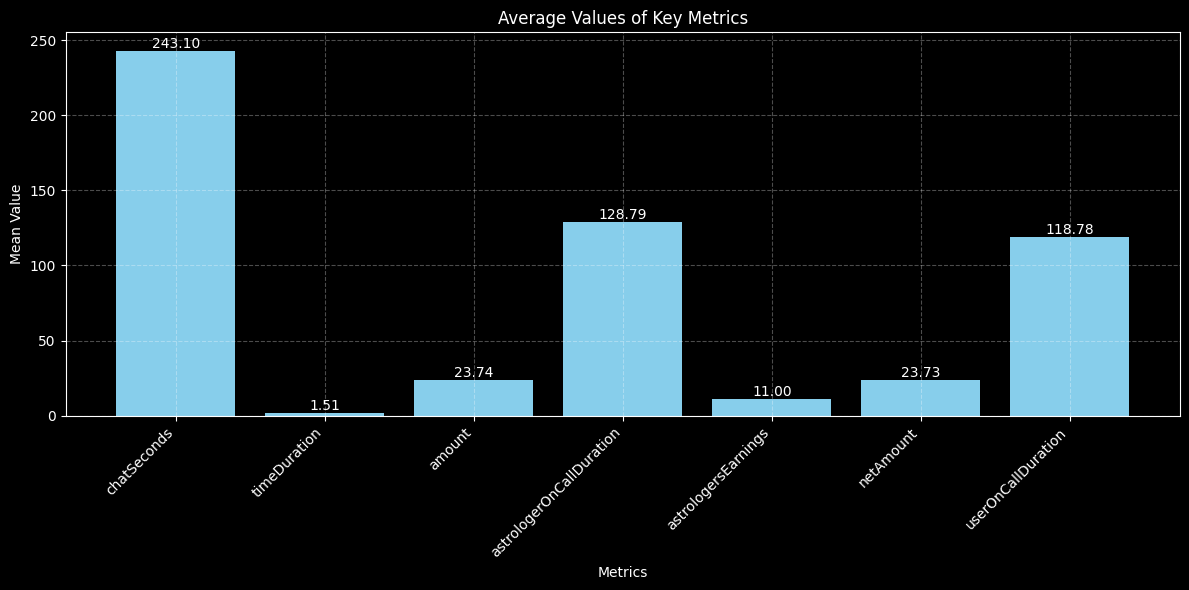

In [50]:
import matplotlib.pyplot as plt

# Create a simple bar plot for mean values
plt.figure(figsize=(12, 6))

# Calculate means for each numeric column
means = data[key_numeric_columns].mean()

# Create bar plot
plt.bar(range(len(means)), means, color='skyblue')

# Customize the plot
plt.title('Average Values of Key Metrics', fontsize=12)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')

# Rotate x-axis labels for better readability
plt.xticks(range(len(means)), key_numeric_columns, rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(means):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()





## Top Performing Astrologers Analysis



In [59]:

guru_performance = data.groupby(['guru', 'guruName']).agg({
    'chatSeconds': ['count', 'mean'],  
    'astrologersEarnings': 'sum',     
    'amount': 'mean',                  
    'chatStatus': lambda x: (x == 'completed').mean() * 100   # Considering only the completed chats
}).round(2)



In [60]:

guru_performance.columns = [
    'Total_Consultations', 
    'Avg_Duration_Seconds',
    'Total_Earnings',
    'Avg_Amount',
    'Completion_Rate_%'
]

guru_performance = guru_performance.reset_index()





In [61]:
top_performers = guru_performance.sort_values('Total_Earnings', ascending=False).head(10)


In [62]:
top_performers.head(10)

,guru,guruName,Total_Consultations,Avg_Duration_Seconds,Total_Earnings,Avg_Amount,Completion_Rate_%
9,65054782f5f203225bfcdc70,Dr Balkrisna,687,165.76,15910.21,115.55,11.35
23,65054784f5f203225bfcdcd4,Astro Ruchi,777,211.35,10274.66,41.22,42.99
93,65489f0807bc1e26099117f8,Astro Shalini,1321,76.53,6807.61,26.44,6.43
94,6548ab2907bc1e26099a8c1d,Astro Divya,1056,258.58,3696.99,20.11,28.79
102,655f2b83f9e3a0877f961727,Astro Sonam S,752,253.72,2907.49,19.61,34.97
0,65053ccd03c045565cf76ff0,Usha Siingh,200,156.00,2870.27,164.02,3.50
122,656a76a964aaf999f4d17b6e,Astro Seema,605,253.09,2690.82,23.00,25.95
128,656e09e32d32774bedc8a14d,Tarot Ari,336,214.82,2222.56,27.29,29.76
98,654957a81a642edaf98c6c9c,Tarot Rupika,567,214.92,2198.75,28.04,12.17
31,65054785f5f203225bfcdcf8,Tarot Bee Riya,743,226.19,2178.71,60.56,2.42


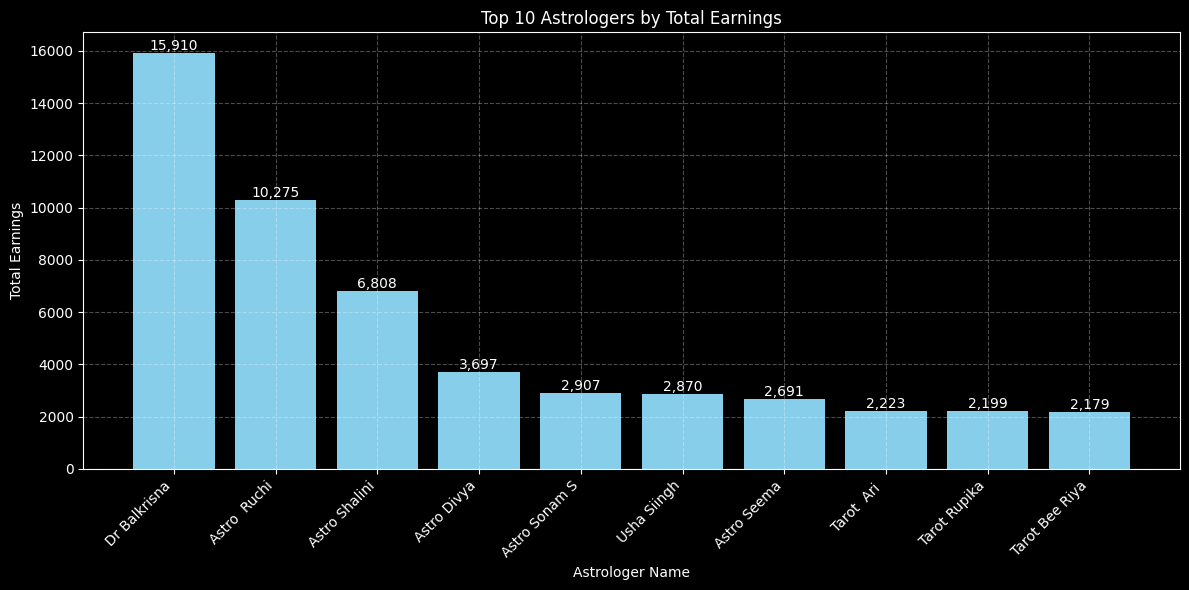

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_performers)), top_performers['Total_Earnings'], color='skyblue')
plt.title('Top 10 Astrologers by Total Earnings', fontsize=12)
plt.xlabel('Astrologer Name')
plt.ylabel('Total Earnings')

plt.xticks(range(len(top_performers)), top_performers['guruName'], rotation=45, ha='right')


for i, v in enumerate(top_performers['Total_Earnings']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Task 2: Call Center Performance Metrics

##### Since the activity coloumn is not present:

Assumptions: My analysis instead uses `chatStatus` as a proxy for activity levels,

In [68]:
chat_talk_time = data.groupby('chatStatus')['chatSeconds'].agg(['mean', 'count']).round(2)
chat_talk_time = chat_talk_time.sort_values('mean', ascending=False)



In [69]:

print("\nAverage Talk Time by Chat Status:")
print("================================")
print(chat_talk_time)




Average Talk Time by Chat Status:
              mean  count
chatStatus               
failed      353.67   7256
incomplete  352.36   6641
completed   339.84   5535
pending     321.25     48
started     310.29     35
NOTKNOWN      0.00   8512


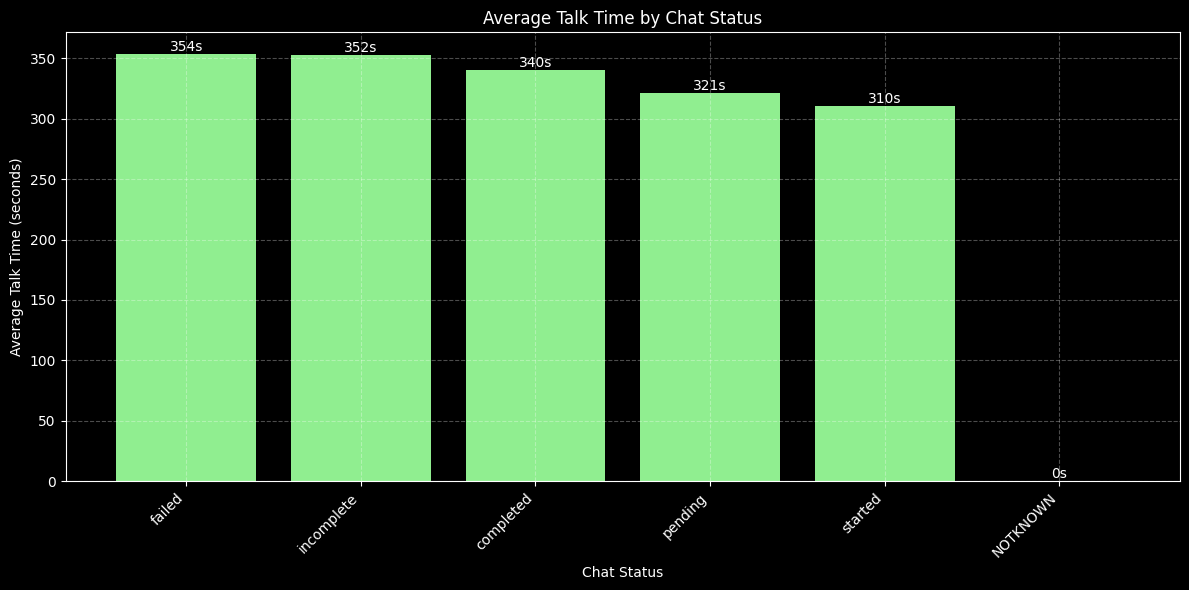

In [70]:

plt.figure(figsize=(12, 6))
plt.bar(range(len(chat_talk_time)), chat_talk_time['mean'], color='lightgreen')
plt.title('Average Talk Time by Chat Status', fontsize=12)
plt.xlabel('Chat Status')
plt.ylabel('Average Talk Time (seconds)')

plt.xticks(range(len(chat_talk_time)), chat_talk_time.index, rotation=45, ha='right')


for i, v in enumerate(chat_talk_time['mean']):
    plt.text(i, v, f'{v:,.0f}s', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [72]:
data.source.unique()

array([nan, 'Production', 'Test'], dtype=object)

In [80]:
# Get value counts of source column and sort in descending order
source_counts = data['source'].value_counts()
print("\nMost Common Sources of Calls:")
print("============================")
source_counts.head()





Most Common Sources of Calls:


source
Production    16256
Test             35
Name: count, dtype: int64

Calculating the Earning and Spending of Users and Maters

In [84]:
total_master_earnings = data['astrologersEarnings'].sum()

total_user_spending = data['amount'].sum()




In [85]:
print("\nFinancial Summary:")
print("=================")
print(f"Total Master Earnings: ₹{total_master_earnings:,.2f}")
print(f"Total User Spending: ₹{total_user_spending:,.2f}")




Financial Summary:
Total Master Earnings: ₹99,146.57
Total User Spending: ₹214,065.90


In [87]:
# CALCULATING AVGs
num_consultations = len(data)
avg_master_earnings = total_master_earnings / num_consultations
avg_user_spending = total_user_spending / num_consultations

print(f"\nPer Consultation Averages:")
print(f"Average Master Earnings: ₹{avg_master_earnings:.2f}")
print(f"Average User Spending: ₹{avg_user_spending:.2f}")   


Per Consultation Averages:
Average User Spending: ₹7.64


In [95]:
# Analyze missing values in amount column
print("\nMissing Values Analysis for Amount:")
print("=================================")
print(f"Total missing values in amount: {data['amount'].isna().sum()}")
print(f"Percentage of missing values: {(data['amount'].isna().sum() / len(data) * 100):.2f}%")




Missing Values Analysis for Amount:
Total missing values in amount: 19011
Percentage of missing values: 67.83%


#### Probable reasons for missing amounts:

1. Failed or incomplete consultations where payment wasn't processed
2. Free consultations or promotional offers  
3. System errors in payment recording
4. Cancelled transactions

In [98]:
print(data[data['amount'].isna()]['chatStatus'].value_counts())


chatStatus
failed        7229
incomplete    6641
NOTKNOWN      5061
pending         48
started         32
Name: count, dtype: int64


In [100]:
# Check relationship between missing amounts and chat status
print("\nMissing Amount Distribution by Chat Status:")
print(data[data['amount'].isna()]['chatStatus'].value_counts())

# Calculate percentage of missing amounts for each chat status
totalHere's how we can analyze the relationship between talk time and charges:


SyntaxError: unterminated string literal (detected at line 6) (1512539357.py, line 6)